In [1]:
import pandas as pd                                                         #to clean and filter data
import numpy as np                                                         #for using data as array
import matplotlib.pyplot as plt                                           #for plotting graph of x,y

import sklearn
from sklearn import datasets, linear_model                               #for model we want to predict by
from sklearn.linear_model import LinearRegression                       #for model we want to predict by
from sklearn.metrics import mean_squared_error, r2_score               #for mean error and variance calculation
from sklearn.model_selection import train_test_split                  #spltting training and testing sets

In [2]:
#retrieving and reading CSV using pandas library

world = pd.read_csv(r'C:\Users\motor\OneDrive\Desktop\SIT Y1S1\dataset\adverse reaction\vaers_jan_nov_2021.csv')
features = pd.read_csv(r'C:\Users\motor\OneDrive\Desktop\SIT Y1S1\dataset\adverse reaction\Features.csv')


#displays up to 50 columns

pd.set_option('display.max_columns', 50)   

#displays up to 200 rows

pd.set_option('display.max_rows', 200)

C:\Users\motor\AppData\Local\Temp\ipykernel_7932\1704350514.py:3: DtypeWarning: Columns (24,29,32,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  world = pd.read_csv(r'C:\Users\motor\OneDrive\Desktop\SIT Y1S1\dataset\adverse reaction\vaers_jan_nov_2021.csv')


In [ ]:
world.info()

In [3]:
df2 = world.drop(world.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]],axis = 1)

In [4]:
count = df2.groupby(['VAX_DOSE_SERIES'])
count['DIED'].value_counts()

VAX_DOSE_SERIES  DIED
1                Y       7237
2                Y       5748
3                Y        164
5                Y         12
6                Y          1
7+               Y          8
UNK              Y       2616
Name: DIED, dtype: int64

In [5]:
count['RECOVD'].value_counts()

VAX_DOSE_SERIES  RECOVD
1                N         172336
                 Y         152680
                 U         104516
2                N         119572
                 Y          89045
                 U          48383
3                N           6217
                 Y           5922
                 U           3556
4                U            101
                 Y             92
                 N             46
5                Y             87
                 N             63
                 U             37
6                Y             45
                 N             26
                 U             24
7+               Y            114
                 N             83
                 U             45
UNK              N          50729
                 Y          32763
                 U          27881
Name: RECOVD, dtype: int64

In [6]:
#number of people with 1 dose and adverse reaction = 172336+152680+104516 = 429532
#number of people with 2 dose and adverse reaction = 119572+89045+48383 = 257000
#number of people with 3 dose and adverse reaction = 6217+5922+3556 = 15695

#percentage of people dying with 1 dose and adverse reaction = 1.6%
#percentage of people dying with 2 dose and adverse reaction = 2.23%
#percentage of people dying with 3 dose and adverse reaction = 1.04%

In [7]:
# assign values to lists  
data = [{'Number_of_people_with_adverse_reaction': 429532, '%_of_people_died_with_adverse_reaction': 1.6}, {'Number_of_people_with_adverse_reaction': 257000, '%_of_people_died_with_adverse_reaction': 2.23},{'Number_of_people_with_adverse_reaction':15695, '%_of_people_died_with_adverse_reaction': 1.04}]  
  
# Creates padas DataFrame by passing  
# Lists of dictionaries and row index.  
dframe = pd.DataFrame(data, index =['1st Dose', '2nd Dose', '3rd Dose'])  
  
# Print the dataframe  
print(dframe)  

          Number_of_people_with_adverse_reaction  \
1st Dose                                  429532   
2nd Dose                                  257000   
3rd Dose                                   15695   

          %_of_people_died_with_adverse_reaction  
1st Dose                                    1.60  
2nd Dose                                    2.23  
3rd Dose                                    1.04  


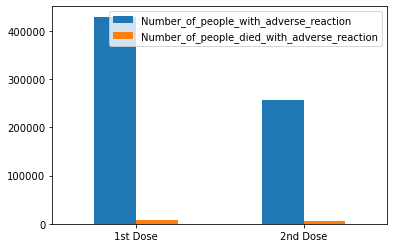

In [8]:
Number_of_people_with_adverse_reaction = [429532, 257000]
Number_of_people_died_with_adverse_reaction = [7237, 5748]
index = ['1st Dose', '2nd Dose']
df = pd.DataFrame({'Number_of_people_with_adverse_reaction': Number_of_people_with_adverse_reaction,
                   'Number_of_people_died_with_adverse_reaction': Number_of_people_died_with_adverse_reaction}, index=index)
ax = df.plot.bar(rot=0)

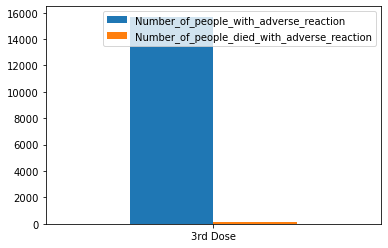

In [9]:
Number_of_people_with_adverse_reaction = [15695]
Number_of_people_died_with_adverse_reaction = [164]
index = ['3rd Dose']
df = pd.DataFrame({'Number_of_people_with_adverse_reaction': Number_of_people_with_adverse_reaction,
                   'Number_of_people_died_with_adverse_reaction': Number_of_people_died_with_adverse_reaction}, index=index)
ax = df.plot.bar(rot=0)

In [ ]:
#The death rate is very low (1-2%) despite having symptons and adverse reaction from vaccionation (1 to 3 doses).